### This notebook trains proteinVI unshared only on protein to see whether it is able to model protein alone or not

In [1]:
import numpy as np
import pandas as pd
from scipy.io import mmread
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 4)
import anndata as ad
import scanpy as sc
import torch
import random

In [2]:
def set_random_seed():
    # Example usage:
    seed = 42
    # Set seed for random module
    random.seed(seed)

    # Set seed for numpy
    np.random.seed(seed)

    # Set seed for torch
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        
set_random_seed()

In [3]:
# read in protein data
protein = pd.read_csv("data/citeseq_pbmc/pro.csv") # 10k cells (protein)
# convert to AnnData
protein_adata = ad.AnnData(
    protein.to_numpy(), dtype=np.float32
)
protein_adata.var_names = protein.columns

# read in celltyle labels
metadata = pd.read_csv('data/citeseq_pbmc/meta.csv')
labels_l1 = metadata['celltype.l1'].to_numpy()
labels_l2 = metadata['celltype.l2'].to_numpy()

protein_adata.obs['celltype.l1'] = labels_l1
protein_adata.obs['celltype.l2'] = labels_l2

print("Final stats of protein adata: \n",protein_adata)

Final stats of protein adata: 
 AnnData object with n_obs × n_vars = 10000 × 224
    obs: 'celltype.l1', 'celltype.l2'


C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [4]:
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

class ProteinRNADataset(Dataset):
    def __init__(self,protein_adata):
        self.data = np.asarray(protein_adata.X)
        self.labels_l1 = protein_adata.obs['celltype.l1']
        self.labels_l2 = protein_adata.obs['celltype.l2']
        
    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        return {"y":self.data[idx], "l1":self.labels_l1[idx], "l2":self.labels_l2[idx]}

dataset = ProteinRNADataset(protein_adata)
train_dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

In [9]:
from scvi.models.proteinvi_unshared import PROTENVI_UNSHARED
import torch.nn.functional as F
model = PROTENVI_UNSHARED(224, latent_distribution="normal", log_variational=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("The device used for training is: ", device)
model.to(device)
model_params = filter(lambda p: p.requires_grad, model.parameters())
optimizer = torch.optim.Adam(model_params, lr=0.001, eps=0.01)

The device used for training is:  cpu


Epoch: 0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 36.26it/s]


Losses at epoch: 0 is 31465.34326171875---------1852.9429740905762--------6712.391098022461


C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


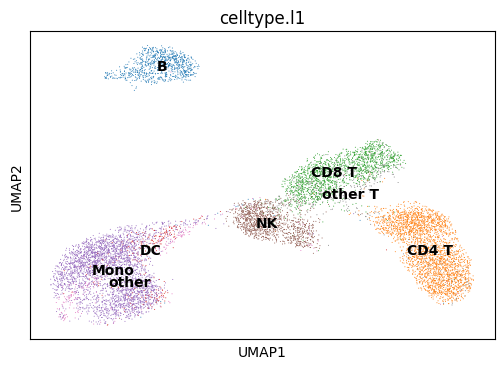

C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


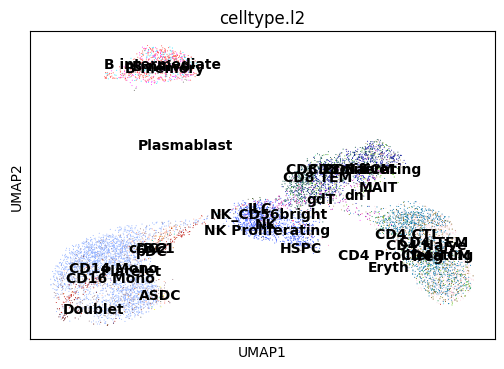

Epoch: 20: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.14it/s]


Losses at epoch: 20 is 27623.212341308594---------804.1449699401855--------1865.0041961669922


Epoch: 40: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 36.41it/s]


Losses at epoch: 40 is 26343.658264160156---------635.0455846786499--------854.3366260528564


Epoch: 50: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.62it/s]
C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


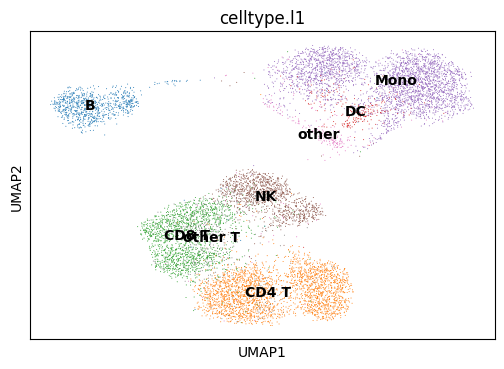

C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


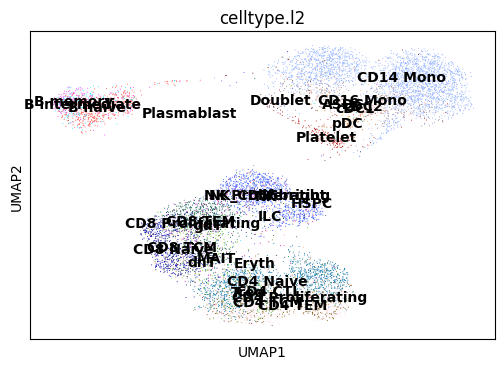

Epoch: 60: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 36.01it/s]


Losses at epoch: 60 is 25623.602111816406---------590.0464372634888--------576.6082096099854


Epoch: 80: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 36.11it/s]


Losses at epoch: 80 is 25092.415161132812---------562.8023567199707--------357.097617149353


Epoch: 100: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 35.07it/s]


Losses at epoch: 100 is 24833.148559570312---------565.4149408340454--------249.50940799713135


C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


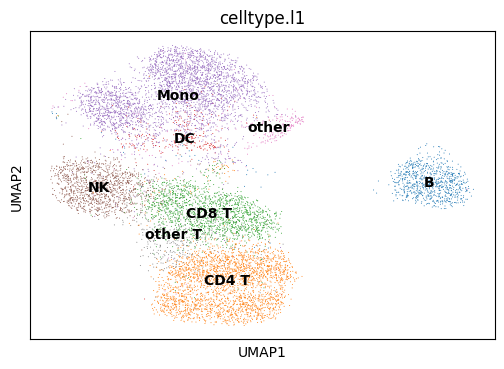

C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


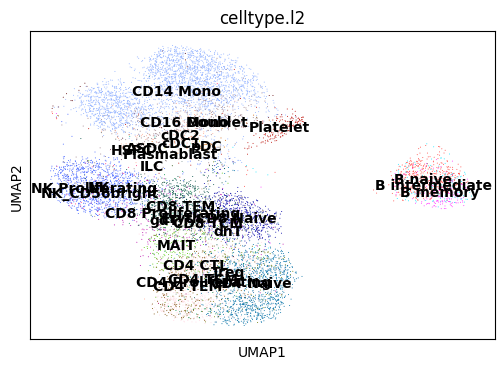

Epoch: 120: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 35.53it/s]


Losses at epoch: 120 is 24541.412719726562---------574.5877914428711--------211.12692618370056


Epoch: 140: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.63it/s]


Losses at epoch: 140 is 24345.308166503906---------581.6483545303345--------248.84009456634521


Epoch: 150: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.87it/s]
C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


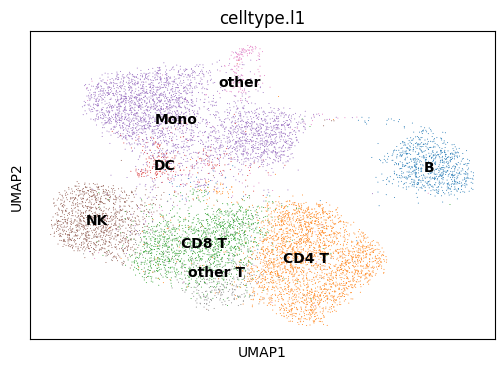

C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


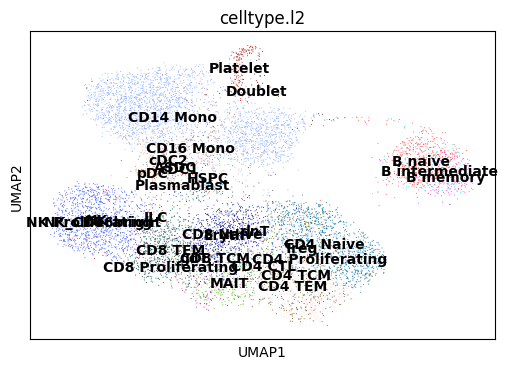

Epoch: 160: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.59it/s]


Losses at epoch: 160 is 24295.177856445312---------585.0480709075928--------164.94053649902344


Epoch: 180: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.76it/s]


Losses at epoch: 180 is 24043.451538085938---------593.2496337890625--------128.90704882144928


Epoch: 200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.87it/s]


Losses at epoch: 200 is 23967.606384277344---------602.7665119171143--------121.04690253734589


C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


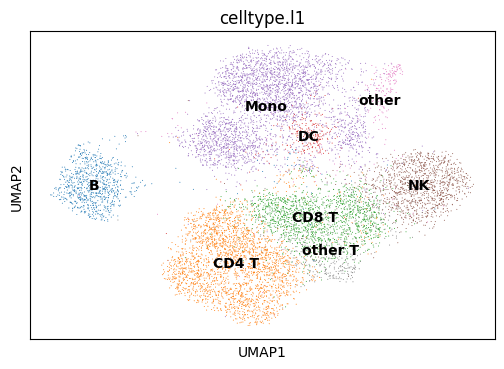

C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


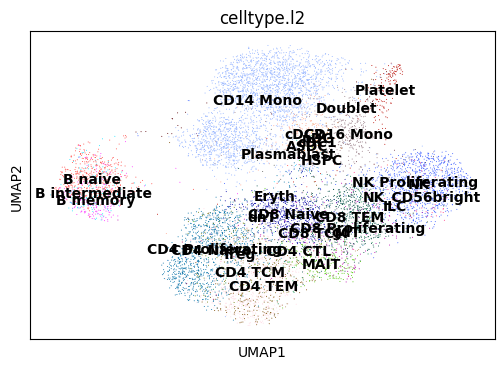

Epoch: 220: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.22it/s]


Losses at epoch: 220 is 23848.879760742188---------604.6737422943115--------218.69862985610962


Epoch: 240: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.60it/s]


Losses at epoch: 240 is 23840.0048828125---------600.2084245681763--------136.86993789672852


Epoch: 250: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.11it/s]
C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


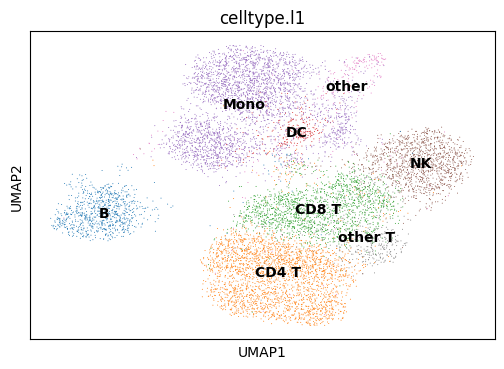

C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


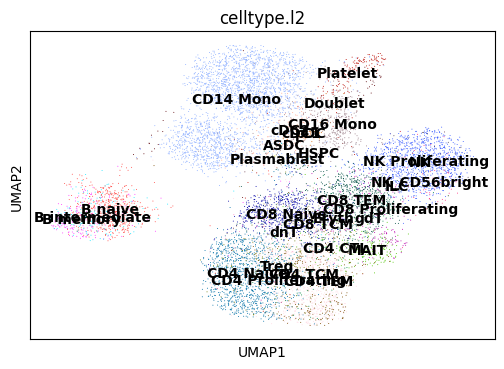

Epoch: 260: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 35.43it/s]


Losses at epoch: 260 is 23732.272338867188---------601.5213479995728--------104.40229308605194


Epoch: 280: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 35.40it/s]


Losses at epoch: 280 is 23722.87890625---------597.5419836044312--------112.7076107263565


Epoch: 300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.28it/s]


Losses at epoch: 300 is 23673.648010253906---------601.5231237411499--------101.04807150363922


C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


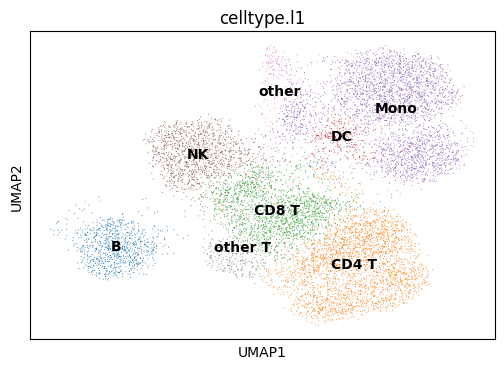

C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


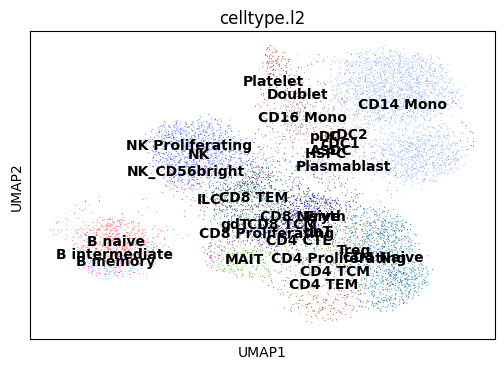

Epoch: 320: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.26it/s]


Losses at epoch: 320 is 23656.07879638672---------590.1986351013184--------108.23388695716858


Epoch: 340: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.93it/s]


Losses at epoch: 340 is 23596.831787109375---------596.5023908615112--------76.13683366775513


Epoch: 350: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.55it/s]
C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


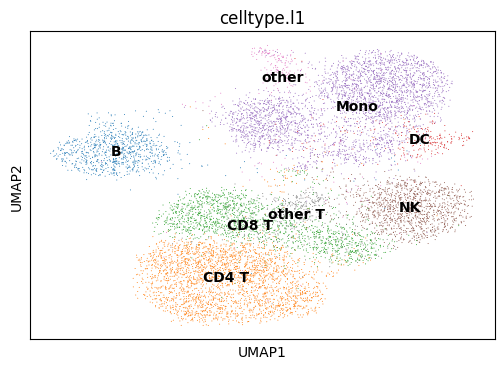

C:\Users\vinee\miniconda3\envs\scvi\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


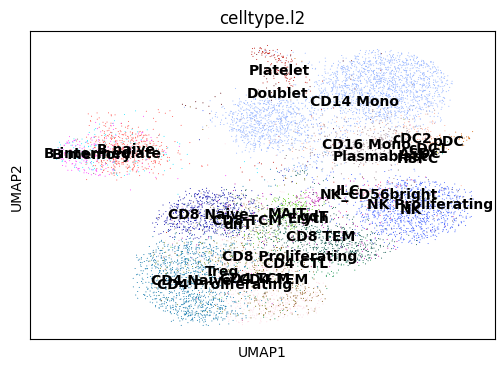

Epoch: 360: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.18it/s]


Losses at epoch: 360 is 23596.037231445312---------597.2770843505859--------80.83061921596527


Epoch: 380: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.92it/s]


Losses at epoch: 380 is 23567.366943359375---------592.5020112991333--------86.65799462795258


Epoch: 399: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.93it/s]


In [11]:
recon_loss_log = []
kl_div_back_pro_log = []
kl_div_z_log = []
for epoch in range(400):
    loss = 0.0
    recon_loss_piter = 0.0
    kl_div_back_pro_piter = 0.0
    kl_div_z_piter = 0.0
    for batch in tqdm(train_dataloader, desc="Epoch: {}".format(epoch)):
        y = batch["y"]
        y = y.to(device)
        optimizer.zero_grad()
        recon_loss, kl_div_z, kl_div_back_pro, _ = model(y)
        loss = torch.mean(recon_loss) + torch.mean(kl_div_z) + torch.mean(kl_div_back_pro)
        loss.backward()
        optimizer.step()
        recon_loss_piter += torch.mean(recon_loss).item()
        kl_div_z_piter += torch.mean(kl_div_z).item()
        kl_div_back_pro_piter += torch.mean(kl_div_back_pro).item()
    recon_loss_log.append(recon_loss_piter/len(train_dataloader))
    kl_div_z_log.append(kl_div_z_piter/len(train_dataloader))
    kl_div_back_pro_log.append(kl_div_back_pro_piter/len(train_dataloader))
    if epoch%20==0:
        print("Losses at epoch: {} is {}---------{}--------{}".format(epoch,recon_loss_piter,kl_div_z_piter, kl_div_back_pro_piter))
    if epoch%50==0:
        with torch.no_grad():
            protein_data = torch.Tensor(dataset.data)
            labelsl1 = dataset.labels_l1
            labelsl2 = dataset.labels_l2
            _, _, _, z = model(protein_data)
            adata_plot = ad.AnnData(X=z.numpy())
            adata_plot.obs['celltype.l1'] = labelsl1
            adata_plot.obs['celltype.l2'] = labelsl2
            sc.pp.neighbors(adata_plot)
            sc.tl.umap(adata_plot)
            sc.pl.umap(adata_plot, color='celltype.l1', legend_loc='on data', s=2)            
            sc.pl.umap(adata_plot, color='celltype.l2', legend_loc='on data', s=2)